In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

In [3]:
from joblib import Memory

memory = Memory('cache')

In [13]:
token_counts = memory.cache(BinCount.token_counts)

In [14]:
import pandas as pd

from itertools import islice

@memory.cache
def build_variance_df(depth=10000):

    tokens = token_counts(depth)

    data = []
    
    for i, (token, count) in enumerate(tokens.items()):

        series = BinCount.token_series(token)

        data.append((count, series.var()))

        if i % 100 == 0:
            print(i)
            
    return pd.DataFrame(
        data,
        columns=('count', 'variance'),
        index=tokens.keys()
    )

In [ ]:
df = build_variance_df()

In [134]:
uni_x = [df['count'].min(), df['count'].max()]
uni_y = [n * (1/100) * (1 - 1/100) for n in uni_x]

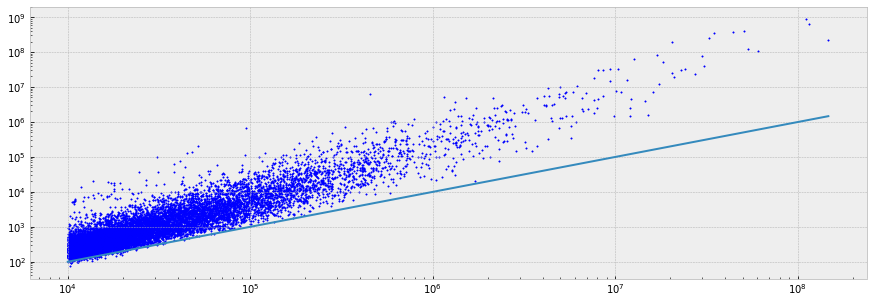

In [137]:
plt.figure(figsize=(15, 5))
plt.xscale('log')
plt.yscale('log')
plt.scatter(df['count'], df['variance'], s=2, c='b')
plt.plot(uni_x, uni_y)
plt.show()

In [98]:
def get_nn(token, k=100):
    
    count = df.loc[token]['count']

    matches = abs(df['count'] - count).sort_values().head(k)
    
    return df.loc[matches.index]

In [99]:
def plot_nn(token, *args, **kwargs):

    nn = get_nn(token, *args, **kwargs)

    plt.scatter(nn['count'], nn['variance'], s=2, c='b')
    plt.show()

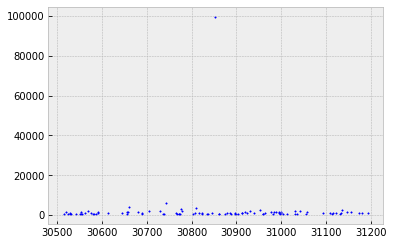

In [121]:
plot_nn('iii')

In [103]:
def nn_zscore(token, *args, **kwargs):

    nn = get_nn(token, *args, **kwargs)
    
    v = df.loc[token]['variance']

    return (
        abs(v - nn['variance'].mean()) /
        nn['variance'].std()
    )

In [119]:
nn_zscore('complexion')

8.3343172014430404

In [115]:
scores = df.index.map(lambda t: nn_zscore(t))
df_scored = df.assign(nn_zscore=scores)

In [138]:
df_scored.sort_values('nn_zscore', ascending=False)

,count,variance,nn_zscore
iii,30853,9.959785e+04,9.863818
3,44941,1.247691e+05,9.794292
2,47991,1.386671e+05,9.746747
i.,95391,6.643961e+05,9.734451
ii,51677,2.006129e+05,9.724397
chapter,452057,6.179661e+06,9.716561
edition,11780,1.388454e+04,9.660842
vii,16609,1.905860e+04,9.629490
project,41135,7.765653e+04,9.569112
6,31206,3.561564e+04,9.524679
